<a href="https://colab.research.google.com/github/Adachi-Yoshitaka/zemikadai/blob/main/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


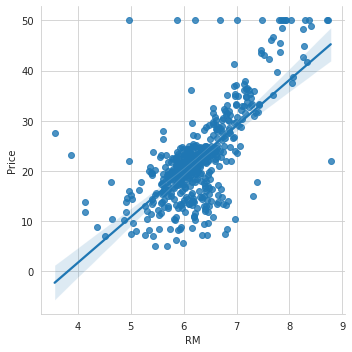

In [ ]:
boston_df = DataFrame(boston.data)
#列名をつける
boston_df.columns = boston.feature_names
#targetじゃわかりづらいので新たに列をコピー
boston_df['Price'] = boston.target
#散布図と回帰直線の表示
sns.lmplot('RM', 'Price', data=boston_df)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

X = boston_df[['RM']].values         # 説明変数（Numpyの配列）
Y = boston_df['Price'].values         # 目的変数（Numpyの配列）

lr.fit(X, Y)                         # 線形モデルの重みを学習

LinearRegression()

In [ ]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  9.10210898118031
intercept =  -34.67062077643857


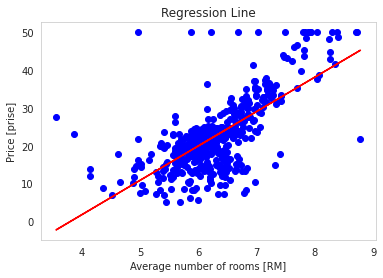

In [ ]:
plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Price [prise]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [ ]:
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split

In [ ]:
li=load_linnerud()
print(li)

{'data': array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]]), 'feature_names': ['Chins', 'Situps', 'Jumps'], 'target': array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193., 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y_df=DataFrame(li.target[:,0])
y_df

,0
0,191.0
1,189.0
2,193.0
3,162.0
4,189.0
5,182.0
6,211.0
7,167.0
8,176.0
9,154.0


In [ ]:
x_df=DataFrame(li.data)
x_df

,0,1,2
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [ ]:
scaler = StandardScaler()
scaler.fit(x_df)
X=scaler.transform( x_df)

In [ ]:
X_df

array([[0.25  ],
       [0.0625],
       [0.6875],
       [0.6875],
       [0.75  ],
       [0.1875],
       [0.4375],
       [0.3125],
       [0.875 ],
       [1.    ],
       [1.    ],
       [0.75  ],
       [0.8125],
       [0.    ],
       [0.3125],
       [0.6875],
       [0.1875],
       [0.625 ],
       [0.875 ],
       [0.0625]])

In [ ]:
lr = LinearRegression()

X = X       # 説明変数（Numpyの配列）
Y = y_df         # 目的変数（Numpyの配列）

lr.fit(X, Y)  
Y_pred = lr.predict(X)

In [ ]:
from sklearn import linear_model as LM
reg=LM.Lasso(alpha=0.1)
reg.fit(X,Y)
y_pred = lr.predict(X)
print(reg.coef_)
print(reg.intercept_)

[ -2.37120633 -13.02513321   4.34617115]
[178.6]


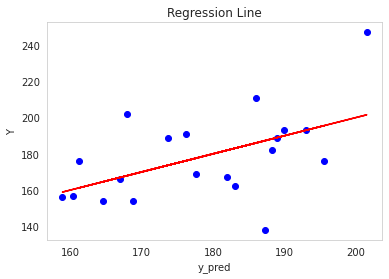

In [ ]:
plt.scatter(y_pred, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(y_pred, y_pred, color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('y_pred') # x軸のラベル
plt.ylabel('Y')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(Y, y_pred))

20.590710285443716

In [ ]:
np.sqrt(r2_score(Y, y_pred))

0.5176089929212943